# Mapping methane in CA

In [2]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
#Import and clean data
data = pd.read_csv('sarp_data_09_21.csv', sep=',')
data = data[data['Longitude'].notna()]
data = data[data['Latitude'].notna()]
data = data.replace({-999: np.nan, -888: np.nan})
data = data.drop(3738)

## Methane by latitude and longitude

In [4]:
#Create geodataframe and projection
geodata = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']), 
    crs='epsg:4326')
crs = ccrs.PlateCarree()
data_proj = geodata.to_crs(crs.proj4_init)

In [5]:
#Import US features
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
counties = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_2_counties',
        scale='10m',
        facecolor='none')
#Method for creating plots
def plotconc(data2, title):
    data2 = data2.sort_values('CH4 (ppmv)')
    fig = plt.figure()
    ax = plt.axes(projection=crs)
    ax.gridlines(crs=crs, draw_labels=True)
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(cfeature.STATES)
    ax.add_feature(states_provinces)
    ax.add_feature(counties, edgecolor='gray')
    ax.set_axisbelow(True)
    x = data2['Longitude']
    y = data2['Latitude']
    sc = ax.scatter(x,y,c=data2['CH4 (ppmv)'], cmap='jet')
    ax.set_title('Methane Concentration by Coordinates '+title)
    ax.set_xlabel('Longitude')
    ax.set_xlim([-123, -115])
    ax.set_ylabel('Latitude')
    ax.set_ylim([32, 40])
    cb = plt.colorbar(sc, pad = 0.15)
    cb.set_label('Methane, ppmv', rotation=270, labelpad=15)
    plt.savefig('mapbig', dpi=700)

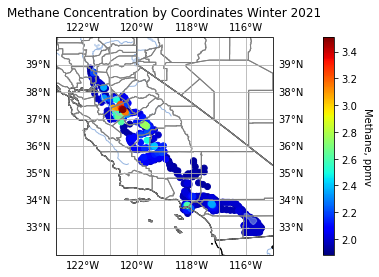

In [6]:
#Plot summer data
'''
for i in range (10):
     year = i+2009
     data_new = geodata[geodata['Year']==year]
     plotconc(data_new, str(year))
'''
#Plot winter data
plotconc(geodata[geodata['Julian Open Time']>44000], 'Winter 2021')

Area of Interest:     
    37-38N, 120-121W     
    Winter Methane Spike     
    Merced County Dairies     
    Summers with relevant data: 09, 10, 14, 16     

In [40]:
def plotconc(data2, title):
    data2 = data2.sort_values('CH4 (ppmv)')
    datanoma = data2[data2['AltP_feet']>1000]
    datama = data2[data2['AltP_feet']<=1000]
    fig = plt.figure()
    ax = plt.axes(projection=crs)
    ax.gridlines(crs=crs, draw_labels=True)
    ax.coastlines()
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(states_provinces)
    ax.add_feature(counties, edgecolor='gray')
    ax.set_axisbelow(True)
    x1 = datanoma['Longitude']
    x2 = datama['Longitude']
    y1 = datanoma['Latitude']
    y2 = datama['Latitude']
    sc = ax.scatter(x1,y1,c=datanoma['CH4 (ppmv)'], s=60, cmap='jet')    
    sc = ax.scatter(x2,y2,c=datama['CH4 (ppmv)'], s=20, cmap='jet')
    #sc = ax.scatter(x,y,c=data2['CH4 (ppmv)'], cmap='jet', vmin = 1.6, vmax = 3.6)
    ax.set_title('Methane Concentration by Coordinates '+title)
    ax.set_xlabel('Longitude')
    ax.set_xlim([-121.5, -119.5])
    ax.set_ylabel('Latitude')
    ax.set_ylim([36.5, 38.5])
    cb = plt.colorbar(sc, pad = 0.15)
    cb.set_label('Methane, ppmv', rotation=270, labelpad=15)


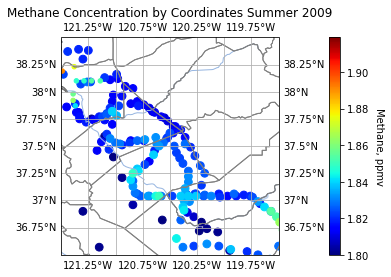

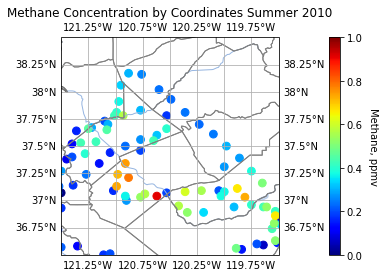

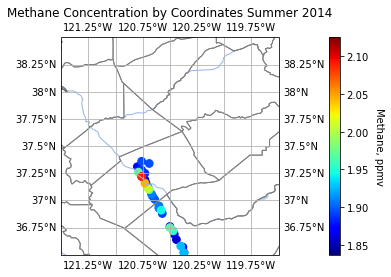

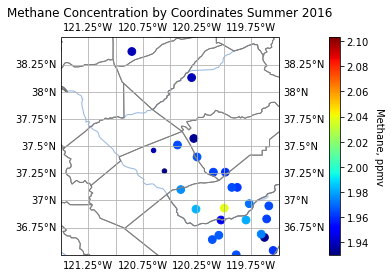

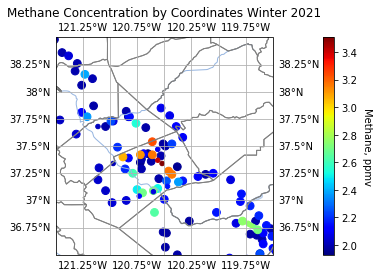

In [41]:
#Plot summer data
geodata_noma = geodata[geodata['AltP_feet']>1000]
plotconc(geodata[geodata['Year']==2009], 'Summer 2009')
plotconc(geodata[geodata['Year']==2010], 'Summer 2010')
plotconc(geodata[geodata['Year']==2014], 'Summer 2014')
plotconc(geodata[geodata['Year']==2016], 'Summer 2016')

#Plot winter data
plotconc(geodata[geodata['Year']==2021], 'Winter 2021')

## Methane by altitude 

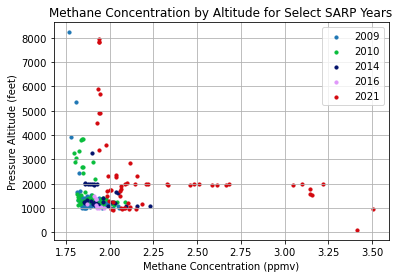

In [44]:
merceddata = geodata[(geodata['Latitude']<38)&(geodata['Latitude']>36.5)&(geodata['Longitude']<-120)&(geodata['Longitude']>-121.5)
                     &(geodata['AltP_feet']<10000)]
nine = merceddata[merceddata['Year']==2009] 
ten = merceddata[merceddata['Year']==2010] 
four = merceddata[merceddata['Year']==2014] 
six = merceddata[merceddata['Year']==2016] 
one = merceddata[merceddata['Year']==2021] 
fig, ax = plt.subplots()
plt.grid()
plt.scatter(nine['CH4 (ppmv)'],nine['AltP_feet'],  label='2009', s=10)
plt.scatter( ten['CH4 (ppmv)'],ten['AltP_feet'], label='2010', s=10, c='#09bd3c')
plt.scatter(four['CH4 (ppmv)'],four['AltP_feet'],  label='2014', s=10, c='#03136b')
plt.scatter(six['CH4 (ppmv)'],six['AltP_feet'],  label='2016', s=10, c='#e098fa')
plt.scatter(one['CH4 (ppmv)'],one['AltP_feet'],  label='2021', s=10, c='#d4080f')
ax.set_xlabel('Methane Concentration (ppmv)')
ax.set_ylabel('Pressure Altitude (feet)')
ax.set_title('Methane Concentration by Altitude for Select SARP Years')
plt.legend()
